In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#memanggil
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = "/content/gdrive/My Drive/anggreyni_mahasiswa/Praktikum_ml/Praktikum06/"

In [5]:
df = pd.read_csv(path+"Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data Analysis

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)

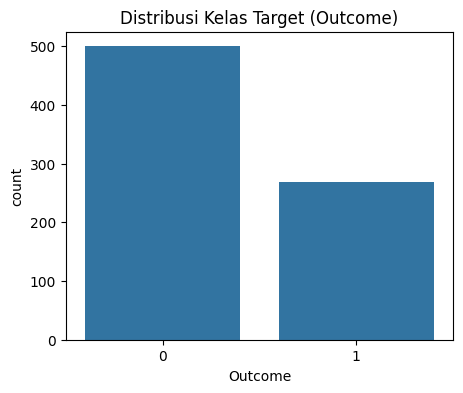

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas Target (Outcome)')
plt.show()

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [23]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data train:", X_train.shape)
print("Jumlah data test:", X_test.shape)

Jumlah data train: (614, 8)
Jumlah data test: (154, 8)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

In [19]:
y_pred = svm_model.predict(X_test_scaled)

print("\nAkurasi Model SVM:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi Model SVM: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



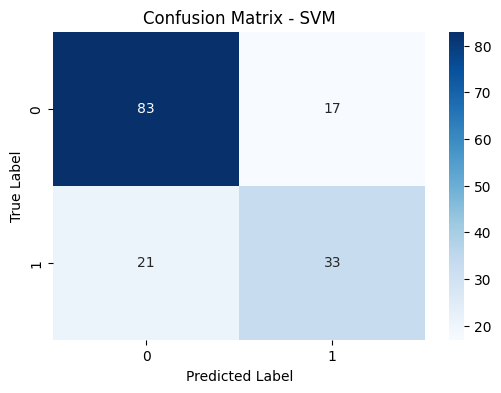

In [20]:
# 12. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

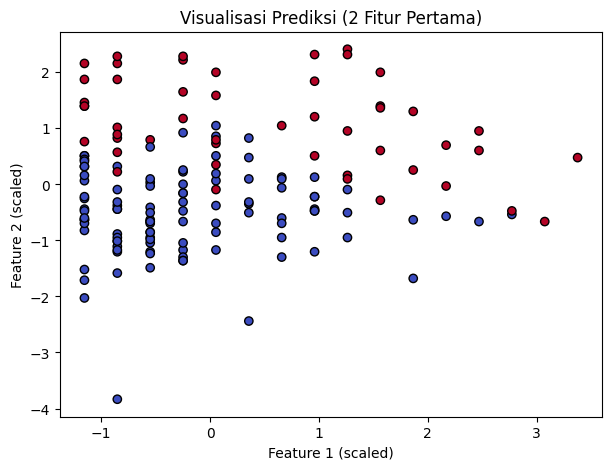

In [21]:
# 13. Visualisasi hasil prediksi (2 fitur contoh)
plt.figure(figsize=(7,5))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Visualisasi Prediksi (2 Fitur Pertama)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

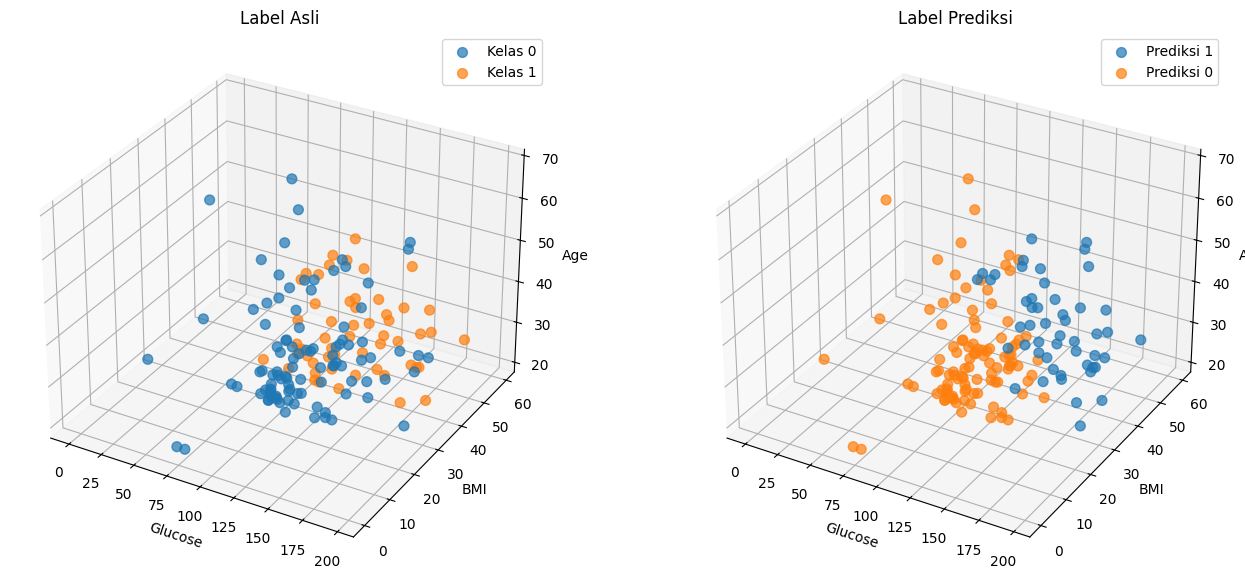

In [22]:
# 13. Visualisasi 3D Hasil Prediksi
# ============================================================

# Buat DataFrame baru untuk hasil prediksi
df_vis = X_test.copy()
df_vis['TrueLabel'] = y_test.values
df_vis['Predicted'] = y_pred

# Ambil tiga fitur untuk visualisasi (bisa diganti sesuai kebutuhan)
feature_3d = ['Glucose', 'BMI', 'Age']

fig = plt.figure(figsize=(16, 7))

# Plot 1: Label Asli
ax1 = fig.add_subplot(121, projection='3d')
for outcome in df_vis['TrueLabel'].unique():
    subset = df_vis[df_vis['TrueLabel'] == outcome]
    ax1.scatter(
        subset[feature_3d[0]],
        subset[feature_3d[1]],
        subset[feature_3d[2]],
        label=f"Kelas {outcome}",
        s=50,
        alpha=0.7
    )

ax1.set_title('Label Asli')
ax1.set_xlabel(feature_3d[0])
ax1.set_ylabel(feature_3d[1])
ax1.set_zlabel(feature_3d[2])
ax1.legend()

# Plot 2: Label Prediksi
ax2 = fig.add_subplot(122, projection='3d')
for outcome in df_vis['Predicted'].unique():
    subset = df_vis[df_vis['Predicted'] == outcome]
    ax2.scatter(
        subset[feature_3d[0]],
        subset[feature_3d[1]],
        subset[feature_3d[2]],
        label=f"Prediksi {outcome}",
        s=50,
        alpha=0.7
    )

ax2.set_title('Label Prediksi')
ax2.set_xlabel(feature_3d[0])
ax2.set_ylabel(feature_3d[1])
ax2.set_zlabel(feature_3d[2])
ax2.legend()

plt.show()